In [145]:
import pandas as pd
inventory = pd.read_csv('/content/T_F41SCHEDULE_B43.zip')

<ipython-input-145-56ef1b1872d7>:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  inventory = pd.read_csv('/content/T_F41SCHEDULE_B43.zip')


In [125]:
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132313 entries, 0 to 132312
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 132313 non-null  int64  
 1   CARRIER              132264 non-null  object 
 2   CARRIER_NAME         132208 non-null  object 
 3   MANUFACTURE_YEAR     132310 non-null  float64
 4   UNIQUE_CARRIER_NAME  132208 non-null  object 
 5   SERIAL_NUMBER        132313 non-null  object 
 6   TAIL_NUMBER          132313 non-null  object 
 7   AIRCRAFT_STATUS      132313 non-null  object 
 8   OPERATING_STATUS     132313 non-null  object 
 9   NUMBER_OF_SEATS      132306 non-null  float64
 10  MANUFACTURER         132313 non-null  object 
 11  AIRCRAFT_TYPE        102380 non-null  object 
 12  MODEL                132302 non-null  object 
 13  CAPACITY_IN_POUNDS   132212 non-null  float64
 14  ACQUISITION_DATE     131346 non-null  object 
 15  AIRLINE_ID       

# Question 1
Investigate the missing data in this dataset. Specifically, for each of the following variables that have missing data, decide if any imputation is possible. Give your reasoning and code if you decide to impute missing values.

Columns for investigation: CARRIER, CARRIER_NAME, MANUFACTURE_YEAR, NUMBER_OF_SEATS, CAPACITY_IN_POUNDS, and AIRLINE_ID.

In [147]:
# check for missing values in specified columns
P1_inventory = inventory[['CARRIER', 'CARRIER_NAME', 'MANUFACTURE_YEAR', 'NUMBER_OF_SEATS', 'CAPACITY_IN_POUNDS', 'AIRLINE_ID']]
print(P1_inventory.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132313 entries, 0 to 132312
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CARRIER             132264 non-null  object 
 1   CARRIER_NAME        132208 non-null  object 
 2   MANUFACTURE_YEAR    132310 non-null  float64
 3   NUMBER_OF_SEATS     132306 non-null  float64
 4   CAPACITY_IN_POUNDS  132212 non-null  float64
 5   AIRLINE_ID          132208 non-null  float64
dtypes: float64(4), object(2)
memory usage: 6.1+ MB
None


In [ ]:
# for entries with a CARRIER value but no CARRIER_NAME, impute with the mode value using CARRIER
from sklearn.impute import SimpleImputer
mode_imputer = SimpleImputer(strategy='most_frequent')

for i in inventory['CARRIER'].unique():
    CARRIER_i_inventory = inventory[inventory['CARRIER'] == i]
    # check if CARRIER_i_inventory is not empty before imputing [used Colab's built-in AI assistant to add this step,
    # not using a prompt, but rather using the "Explain error" function]
    if not CARRIER_i_inventory.empty:
        CARRIER_i_inventory['CARRIER_NAME'] = mode_imputer.fit_transform(CARRIER_i_inventory[['CARRIER_NAME']])[:,0]
        inventory.update(CARRIER_i_inventory)

In [ ]:
median_imputer = SimpleImputer(strategy='median')

# impute NUMBER_OF_SEATS and CAPACITY_IN_POUNDS using the median values based on MODEL

# filter models with more than 100 entries
MODEL_value_counts = inventory['MODEL'].value_counts()
MODEL_filtered = MODEL_value_counts[MODEL_value_counts > 100].index
MODEL_filtered_inventory = inventory[inventory['MODEL'].isin(MODEL_filtered)]

for i in MODEL_filtered_inventory['MODEL'].unique():
    MODEL_i_inventory = inventory[inventory['MODEL'] == i]
    if not MODEL_i_inventory.empty:
        MODEL_i_inventory['NUMBER_OF_SEATS'] = median_imputer.fit_transform(MODEL_i_inventory[['NUMBER_OF_SEATS']])[:,0]
        MODEL_i_inventory['CAPACITY_IN_POUNDS'] = median_imputer.fit_transform(MODEL_i_inventory[['CAPACITY_IN_POUNDS']])[:,0]
        inventory.update(MODEL_i_inventory)

In [ ]:
# for entries with a UNIQUE_CARRIER value but no AIRLINE_ID, impute with the mode value using UNIQUE_CARRIER
for i in inventory['UNIQUE_CARRIER'].unique():
    UNIQUE_CARRIER_i_inventory = inventory[inventory['UNIQUE_CARRIER'] == i]
    # check if CARRIER_i_inventory is not empty before imputing
    if not UNIQUE_CARRIER_i_inventory.empty:
        UNIQUE_CARRIER_i_inventory['AIRLINE_ID'] = mode_imputer.fit_transform(UNIQUE_CARRIER_i_inventory[['AIRLINE_ID']])[:,0]
        UNIQUE_CARRIER_i_inventory.update(UNIQUE_CARRIER_i_inventory)

# Question 2
Inspect the columns MANUFACTURER, MODEL, AIRCRAFT_STATUS, and OPERATING_STATUS. Decide, for each column, if transformation or standardization of data are required. Give your reasoning and code if you decide to transform the data.


In [151]:
# inspect the columns MANUFACTURER, MODEL, AIRCRAFT_STATUS, and OPERATING_STATUS
display(inventory['MANUFACTURER'].value_counts())
display(inventory['MODEL'].value_counts())
display(inventory['AIRCRAFT_STATUS'].value_counts())
display(inventory['OPERATING_STATUS'].value_counts())

,count
MANUFACTURER,
BOEING,15922
Embraer,11508
THEBOEINGCO,9223
Bombardier,8871
Boeing,8392
...,...
BEECHHAWKER400XP,1
Dassault-Falcon-2000EXEASy,1
ISRAELAIRCRAFTINDUSTRIES,1


,count
MODEL,
EMB-145,2614
B-737-7H4,2470
B737-823,2370
A320-232,2333
A321-231,2259
...,...
A321-231(P2F),1
777FFX,1
T210N,1


,count
AIRCRAFT_STATUS,
O,79487
b,30852
B,12699
a,7804
A,1330
L,122
o,19


,count
OPERATING_STATUS,
Y,126577
N,5664
y,71
,1


In [152]:
# standardize MANUFACTURER by uppercasing and removing whitespace
inventory['MANUFACTURER'] = inventory['MANUFACTURER'].str.upper().str.strip()

# define a list of the top 6 biggest manufacturers to standadize MANUFACTURER values
MANUFACTURER_standardized_names = ['AIRBUS', 'BOEING', 'BOMBARDIER', 'EMBRAER', 'CESSNA', 'DOUGLAS']

# loop through the list of standardized names and update MANUFACTURER
for i in MANUFACTURER_standardized_names:
    inventory.loc[inventory['MANUFACTURER'].str.contains(i), 'MANUFACTURER'] = i

# standardize MODEL by uppercasing and removing whitespace
inventory['MODEL'] = inventory['MODEL'].str.upper().str.strip()

# standardize AIRCRAFT_STATUS by uppercasing and removing whitespace
inventory['AIRCRAFT_STATUS'] = inventory['AIRCRAFT_STATUS'].str.upper()

# standardize OPERATING_STATUS by uppercasing and and then transform to boolean
inventory['OPERATING_STATUS'] = inventory['OPERATING_STATUS'].str.upper()
inventory['OPERATING_STATUS'] = inventory['OPERATING_STATUS'].replace({'Y': True, 'N':False})

# Question 3

Remove data rows that still have missing values. Report the amount of remaining data you obtained.



In [153]:
# drop the rows with missing values remaining in imputed columns
inventory = inventory.dropna(subset= ['CARRIER', 'CARRIER_NAME',
                                 'MANUFACTURE_YEAR', 'NUMBER_OF_SEATS',
                                 'CAPACITY_IN_POUNDS', 'AIRLINE_ID'],
                                   how='any')

# Question 4
For the columns NUMBER_OF_SEATS and CAPACITY_IN_POUNDS, check the skewness in the variable and plot a histogram for each variable.

The Box-Cox transformation (scipy.stats.boxcox) is one possible way to transform variables into a "more-normal-like" variable. Apply the Box-Cox transformation for these two columns and save them as new columns, i.e. XXXXXXXXX_BOXCOX.

Plot a histogram for each transformed variable.
Describe what you observe before and after transformation.



the skewness of NUMBER_OF_SEATS is: 0.42977803549995075


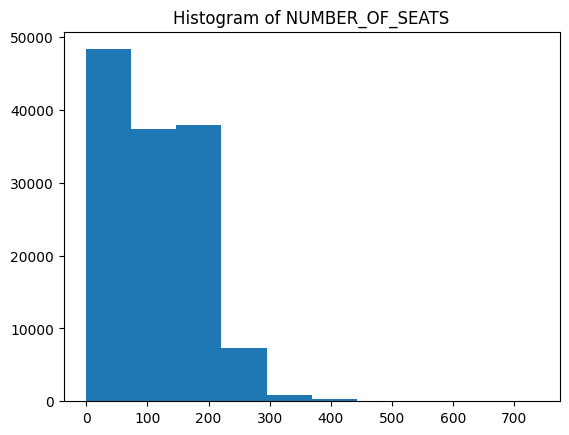

the skewness of CAPACITY_IN_POUNDS is: 4.056696438092751


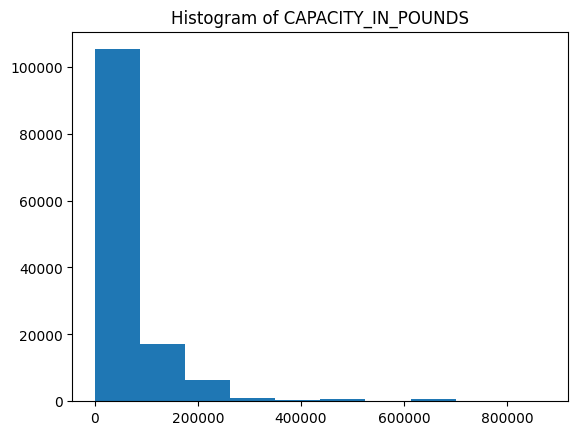

In [154]:
import matplotlib.pyplot as plt
from scipy import stats

# calculate skewness and plot histograms for NUMBER_OF_SEATS and CAPACITY_IN_POUNDS
print('the skewness of NUMBER_OF_SEATS is:', inventory['NUMBER_OF_SEATS'].skew())
plt.hist(inventory['NUMBER_OF_SEATS'])
plt.title('Histogram of NUMBER_OF_SEATS')
plt.show()

print('the skewness of CAPACITY_IN_POUNDS is:', inventory['CAPACITY_IN_POUNDS'].skew())
plt.hist(inventory['CAPACITY_IN_POUNDS'])
plt.title('Histogram of CAPACITY_IN_POUNDS')
plt.show()

the skewness of transformed NUMBER_OF_SEATS is: -0.5092952795459038


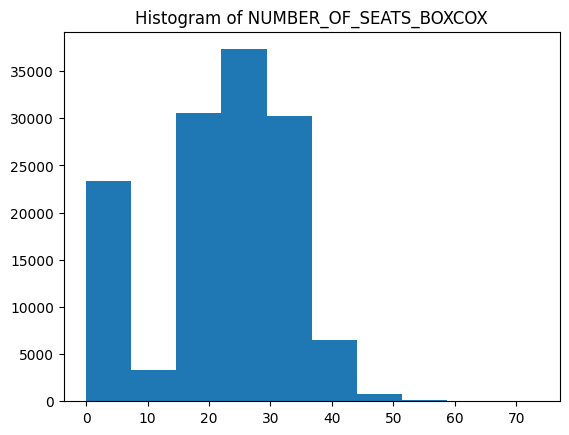

the skewness of transformed CAPACITY_IN_POUNDS is: 0.2308604368299059


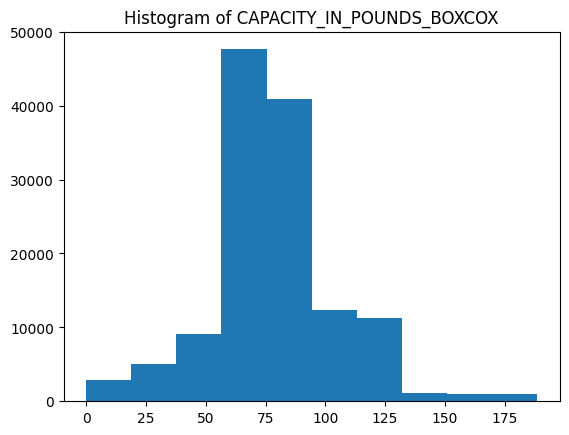

In [155]:
# apply the Box-Cox transformation
inventory['NUMBER_OF_SEATS_BOXCOX'], _ = stats.boxcox(inventory['NUMBER_OF_SEATS'] + 1)
inventory['CAPACITY_IN_POUNDS_BOXCOX'], _ = stats.boxcox(inventory['CAPACITY_IN_POUNDS'] + 1)

# calculate skewness and plot histograms for transformed variables
print('the skewness of transformed NUMBER_OF_SEATS is:', inventory['NUMBER_OF_SEATS_BOXCOX'].skew())
plt.hist(inventory['NUMBER_OF_SEATS_BOXCOX'])
plt.title('Histogram of NUMBER_OF_SEATS_BOXCOX')
plt.show()

print('the skewness of transformed CAPACITY_IN_POUNDS is:', inventory['CAPACITY_IN_POUNDS_BOXCOX'].skew())
plt.hist(inventory['CAPACITY_IN_POUNDS_BOXCOX'])
plt.title('Histogram of CAPACITY_IN_POUNDS_BOXCOX')
plt.show()

# Question 5

Create a new column SIZE by the quartiles of NUMBER_OF_SEATS

below 25% percentile: SMALL

25% - 50% percentile: MEDIUM

50% - 75% percentile: LARGE

above 75% percentile: XLARGE

For each size group, provide and plot the proportions of aircrafts that are operating versus not (OPERATING_STATUS).

For each size group, provide and plot the proportions of aircrafts belonging to each aircraft status group (AIRCRAFT_STATUS).

Provide a written summary of your findings.



SIZE    OPERATING_STATUS
LARGE   True                29703
        False                1158
MEDIUM  True                36954
        False                2474
                                1
SMALL   True                25503
        False                1077
XLARGE  True                34334
        False                 940
Name: count, dtype: int64

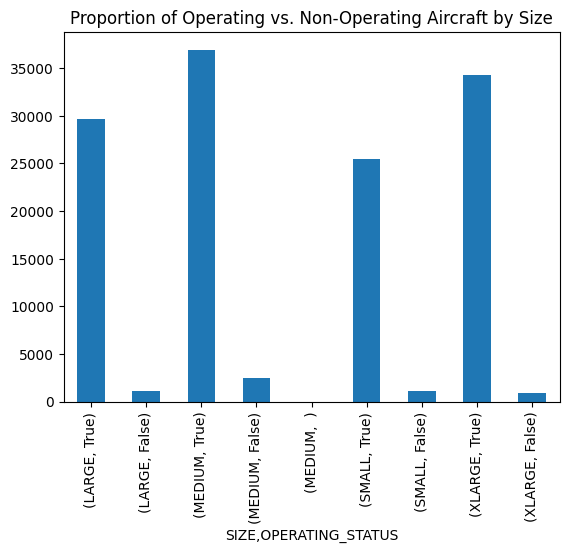

SIZE    AIRCRAFT_STATUS
LARGE   O                  19789
        B                   7590
        A                   3438
        L                     44
MEDIUM  B                  21196
        O                  15981
        A                   2218
        L                     34
SMALL   O                  19169
        B                   6444
        A                    967
XLARGE  O                  24521
        B                   8253
        A                   2456
        L                     44
Name: count, dtype: int64

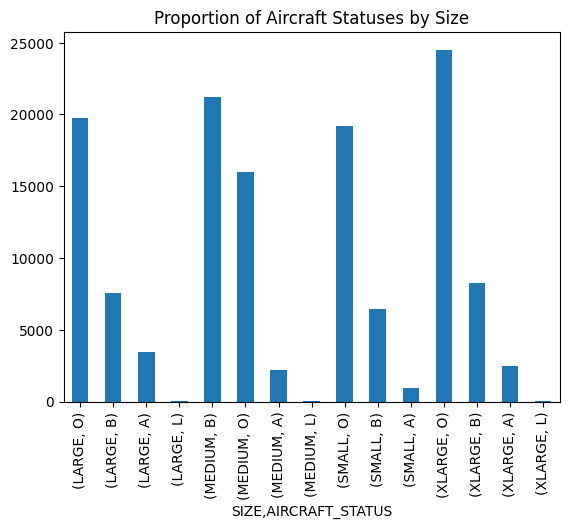

In [166]:
# calculate quartiles for NUMBER_OF_SEATS
quartiles = inventory['NUMBER_OF_SEATS'].quantile([0.25, 0.5, 0.75])

# create the SIZE column based on quartiles of NUMBER_OF_SEATS
def categorize_size(seats):
    if seats < quartiles[0.25]:
        return 'SMALL'
    elif seats < quartiles[0.5]:
        return 'MEDIUM'
    elif seats < quartiles[0.75]:
        return 'LARGE'
    else:
        return 'XLARGE'

inventory['SIZE'] = inventory['NUMBER_OF_SEATS'].apply(categorize_size)

# display and plot the proportion of operating aircraft by size
OPERATING_STATUS_by_size = inventory.groupby('SIZE')['OPERATING_STATUS'].value_counts()
display(OPERATING_STATUS_by_size)
OPERATING_STATUS_by_size.plot(kind='bar')
plt.title('Proportion of Operating vs. Non-Operating Aircraft by Size')
plt.show()

# display and plot the proportion of aircrafts belonging to each aircraft status group by size
AIRCRAFT_STATUS_by_size = inventory.groupby('SIZE')['AIRCRAFT_STATUS'].value_counts()
display(AIRCRAFT_STATUS_by_size)
AIRCRAFT_STATUS_by_size.plot(kind='bar')
plt.title('Proportion of Aircraft Statuses by Size')
plt.show()